In [12]:
import os
import numpy as np
from sklearn.decomposition import PCA
from utils.visualisation import *
import sys
sys.path.append('../')
from helper.DataLoaderMNIST import DataLoader_MNIST
import torchvision.transforms as transforms
import torch
from resnet.model_def import ResNet
from VAE.model_def import VAE

In [23]:
#reimpmort modules with autoreload
%load_ext autoreload
%autoreload 2

import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/mariotuci/Desktop/Google-Drive/Master/SoSe-24/Project Studies/Project/Code/latent-communication


In [26]:
seed1 = 3
seed2 = 4
config = {
   
    "path_map":f'optimization/VAE-LinearTransform/Linear_VAE_{seed1}_resnet_{seed2}_100.npy',
    "path_model1": f'VAE/models/MNIST_VAE_{seed1}_10.pth',
    "path_model2": f'resnet/models/model_seed{seed2}.pth'}

In [27]:
#Load mapping
A = np.load(config["path_map"])
#Load models
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model1 = VAE(in_dim=784, dims=[256, 128, 64, 32], distribution_dim=16).to(DEVICE)
model1.load_state_dict(torch.load(config['path_model1'],map_location = DEVICE))

model2 = ResNet(pretrained=False).to(DEVICE)# Load pretrained weights for model2
model2.load_state_dict(torch.load(config['path_model2'],map_location = DEVICE))

/Users/mariotuci/miniconda/envs/relreps/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mariotuci/miniconda/envs/relreps/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [28]:
## Get dataloader to plot
# Transformations
transformations2 = [transforms.ToTensor(),
                    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                    ]
# Transdormations
transformations1= [transforms.ToTensor(), 
                                # Normalize between -1 and 1
                                transforms.Normalize((0.5,), (0.5,)),
                                # Flatten the Image to a vector
                                transforms.Lambda(lambda x: x.view(-1) )
                                ]

# Load the data
batch_size=256
data_loader = DataLoader_MNIST(batch_size, transformations1, transformations2)



In [29]:
number_batches_to_plot=100
train_loader1, train_loader2 = data_loader.get_train_loader()
latent_space_model2,all_labels_model2 = get_latent_space_data(model2, train_loader2, DEVICE,number_batches_to_plot)
latent_space_model1,all_labels_model1 = get_latent_space_data(model1, train_loader1, DEVICE,number_batches_to_plot)

## Latent Space visualization with PCA

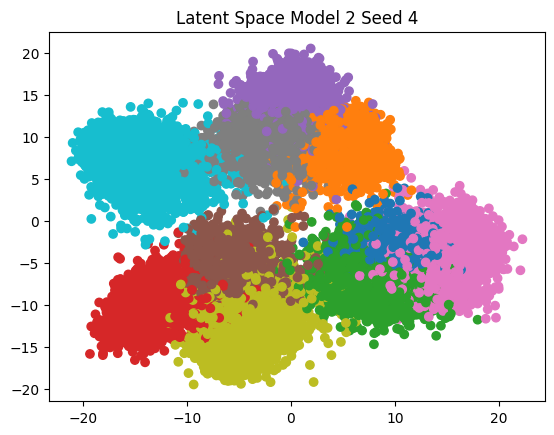

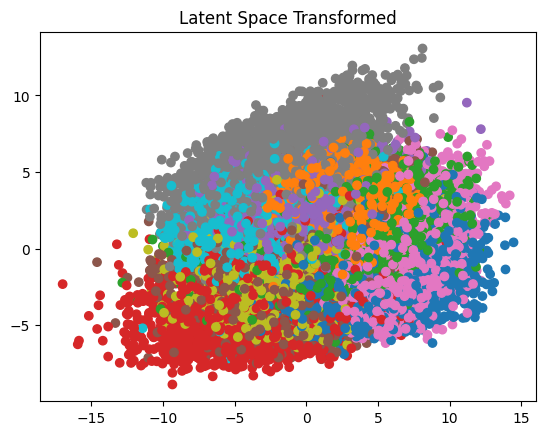

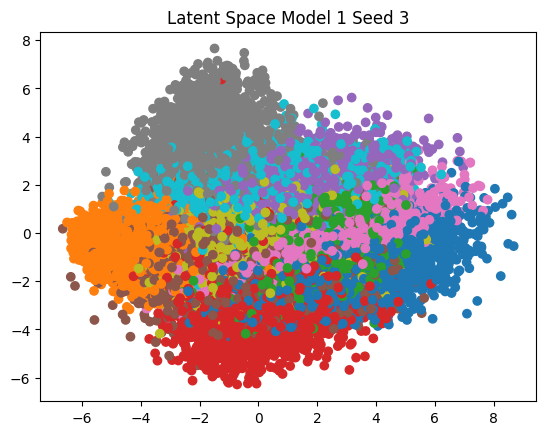

In [31]:
pca_model2 = pca_def(latent_space_model2)
plotLatentTransformed(latent_space_model2,all_labels_model2, np.eye(latent_space_model2.shape[1]), pca_model2, f"Model 2 Seed {seed2}")
plotLatentTransformed(latent_space_model1,all_labels_model1, A, pca_model2, "Transformed")
pca_model1 = pca_def(latent_space_model1)
plotLatentTransformed(latent_space_model1,all_labels_model1, np.eye(latent_space_model1.shape[1]), pca_model1, f"Model 1 Seed {seed1}")

## Distances

In [36]:
print("Average distance transformed and model2: ", avg_transformed_distances(latent_space_model1, latent_space_model2, A))
#print("Average distance model1 and model2: ", avg_transformed_distances(latent_space_model1, latent_space_model2, np.eye(latent_space_model1.shape[1])))

(32,)
(512,)
(512, 32)
Average distance transformed and model2:  24.952928413547294


In [34]:
A.shape

(512, 32)